## Atividade 01: Mineração de Dados vendas Supermercados

Com base no dataset que temos utilizado em nossa aula, crie os seguintes gráficos:

1. Criar um gráfico de barras verticais que mostre o total de vendas por categoria de produto.

2. Crie um gráfico de pizza mostrando a porcentagem de vendas por gênero de clientes.

3. Crie um gráfico de pizza mostrando a porcentagem da distribuição de clientes por cidade 

4. Agrupe os dados por cidade faça a soma de vendas por cidade e mostre em um gráfico de barras

5. Mostre A distribuição de vendas por categoria de produtos

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_src = r'db/vendas_supermercado.csv'
data = pd.read_csv(data_src)

data.head()



,Produto,Quantidade,Preço Unitário,Total,Linha de Produto,Tipo de Cliente,Gênero,Cidade
0,Carne Bovina,1.0,25.0,25.0,Carnes,Pessoa Jurídica,Feminino,Rio de Janeiro
1,Sabão,1.0,8.0,8.0,Limpeza,Pessoa Jurídica,Feminino,Rio de Janeiro
2,Frango,1.0,12.0,12.0,Carnes,Pessoa Jurídica,Feminino,Rio de Janeiro
3,Detergente,1.0,3.5,3.5,Limpeza,Pessoa Jurídica,Feminino,Rio de Janeiro
4,Leite,8.0,4.5,36.0,Laticínios,Pessoa Física,Masculino,Porto Alegre


### Limpeza do dataset

In [18]:
# Remover os espaços em branco das colunas
for index in data.columns:
    # Verifica se a coluna é do tipo String
    if data[index].dtype == 'object':
        data[index] = data[index].str.strip()

nulos = data.isnull().sum()

print(f'Quantidade de valores nulos: \n\n{nulos[nulos > 0]}')



Quantidade de valores nulos: 

Quantidade    713
Cidade        660
dtype: int64


### 1. Total de Vendas por Categoria do Produto

Criar um gráfico de barras verticais que mostre o total de vendas por categoria de produto.

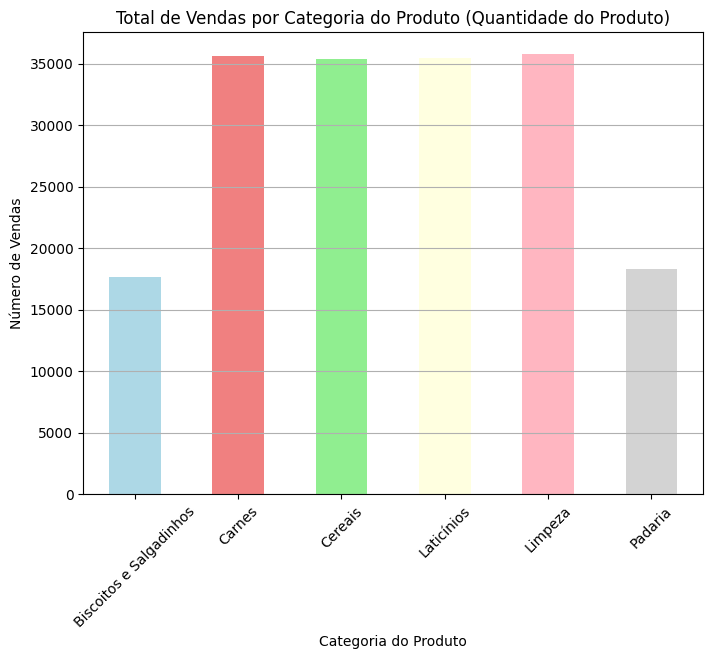

In [19]:
distribuicao_categoria = data.groupby('Linha de Produto')['Quantidade'].sum()

plt.figure(figsize=(8, 6))
distribuicao_categoria.plot(
    kind='bar', 
    color=['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']
)
plt.title('Total de Vendas por Categoria do Produto (Quantidade do Produto)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y')
plt.show()

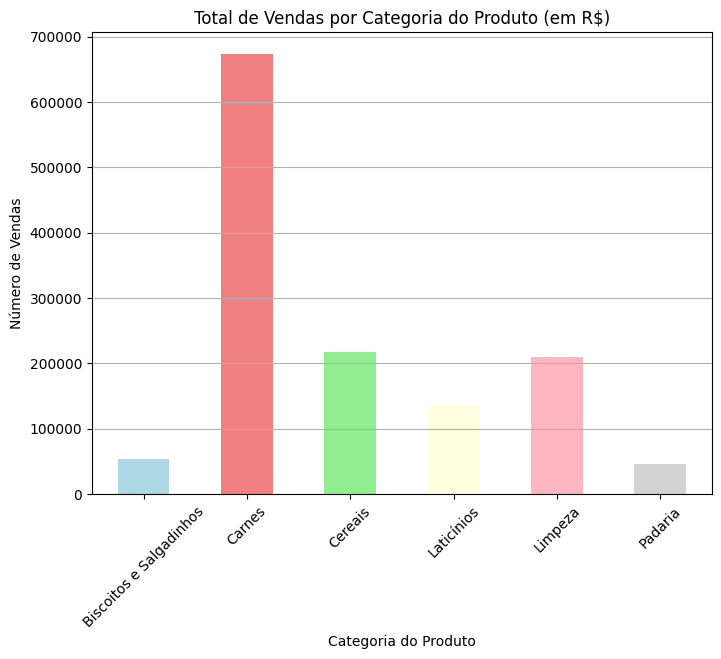

In [20]:
distribuicao_categoria = data.groupby('Linha de Produto')['Total'].sum()

plt.figure(figsize=(8, 6))
distribuicao_categoria.plot(
    kind='bar', 
    color=['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']
)
plt.title('Total de Vendas por Categoria do Produto (em R$)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y')
plt.show()

### 2. Distribuição por Gênero de Clientes

Crie um gráfico de pizza mostrando a porcentagem de vendas por gênero de clientes.

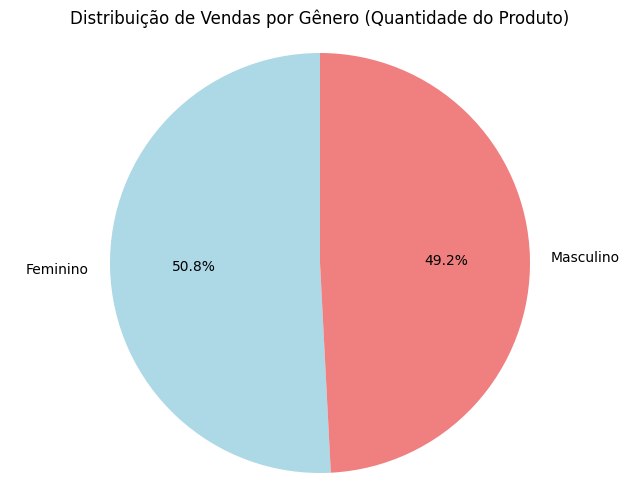

In [21]:
distribuicao_genero = data.groupby('Gênero')['Quantidade'].sum()

# Preparar os dados
labels = distribuicao_genero.index
sizes = distribuicao_genero.values
colors = ['#ADD8E6', '#F08080']

# Criar gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',  # Exibe porcentagem em cada fatia
    startangle=90  # Começa a desenhar do ângulo 90 graus
)

plt.title('Distribuição de Vendas por Gênero (Quantidade do Produto)')
plt.axis('equal')  # Garante que o gráfico será circular
plt.show()

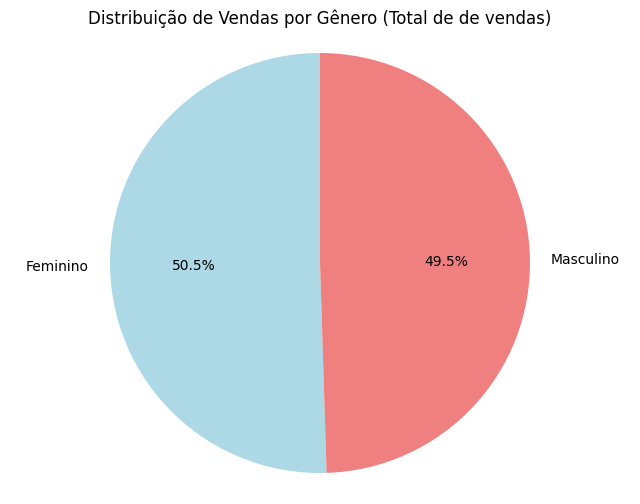

In [22]:
distribuicao_genero = data.groupby('Gênero')['Total'].sum()

# Preparar os dados
labels = distribuicao_genero.index
sizes = distribuicao_genero.values
colors = ['#ADD8E6', '#F08080']

# Criar gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',  # Exibe porcentagem em cada fatia
    startangle=90  # Começa a desenhar do ângulo 90 graus
)

plt.title('Distribuição de Vendas por Gênero (Total de de vendas)')
plt.axis('equal')  # Garante que o gráfico será circular
plt.show()

### 3. Distribuição de Clientes por cidade
Crie um gráfico de pizza mostrando a porcentagem da distribuição de clientes por cidade.

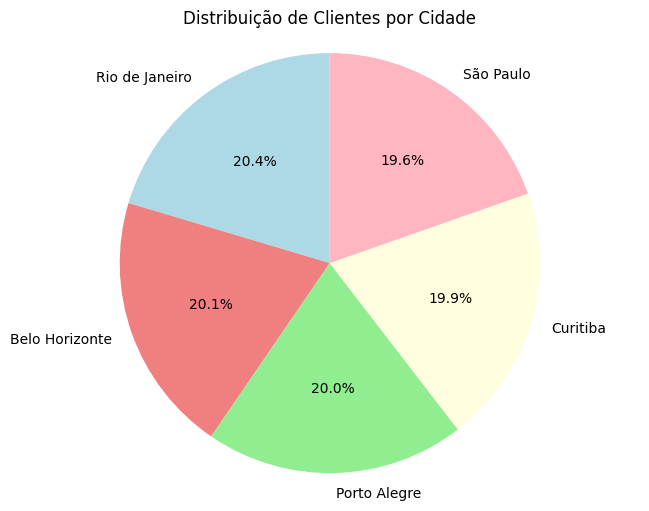

In [23]:
distribuicao_cidade = data['Cidade'].value_counts()

labels = distribuicao_cidade.index
sizes = distribuicao_cidade.values
colors = ['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribuição de Clientes por Cidade')
plt.axis('equal')
plt.show()

### 4. Vendas por Cidade 

Agrupe os dados por cidade faça a soma de vendas por cidade e mostre em um gráfico de barras

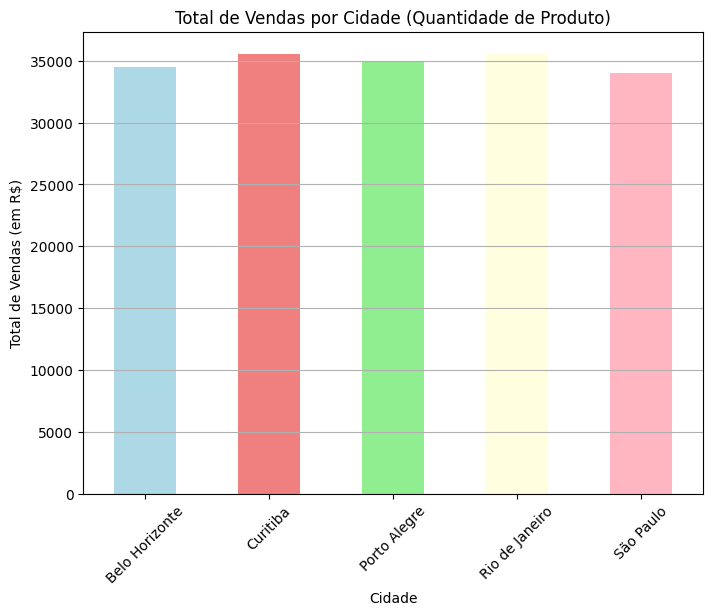

In [24]:
vendas_por_cidade = data.groupby('Cidade')['Quantidade'].sum()

plt.figure(figsize=(8, 6))
vendas_por_cidade.plot(
    kind='bar',
    color=['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']
)

plt.title('Total de Vendas por Cidade (Quantidade de Produto)')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas (em R$)')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y')
plt.show()

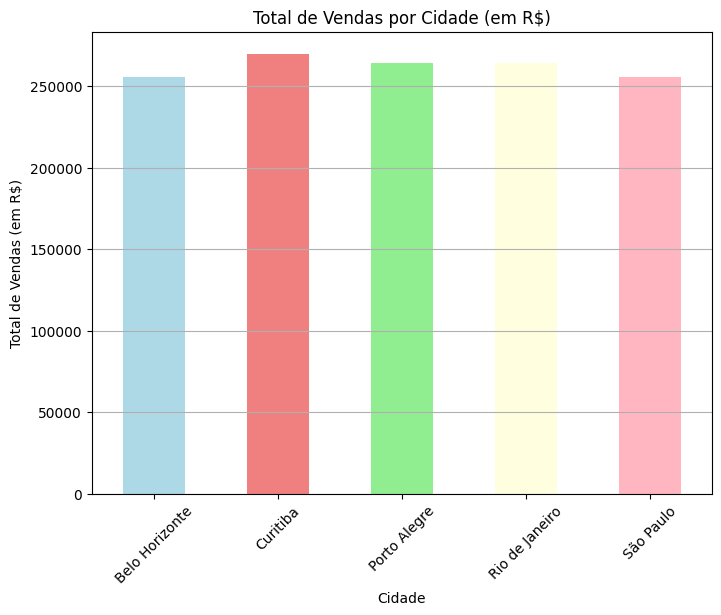

In [25]:
vendas_por_cidade = data.groupby('Cidade')['Total'].sum()

plt.figure(figsize=(8, 6))
vendas_por_cidade.plot(
    kind='bar',
    color=['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']
)

plt.title('Total de Vendas por Cidade (em R$)')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas (em R$)')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y')
plt.show()

### 5. Distribuição por Categoria de Produto

Mostre A distribuição de vendas por categoria de produtos

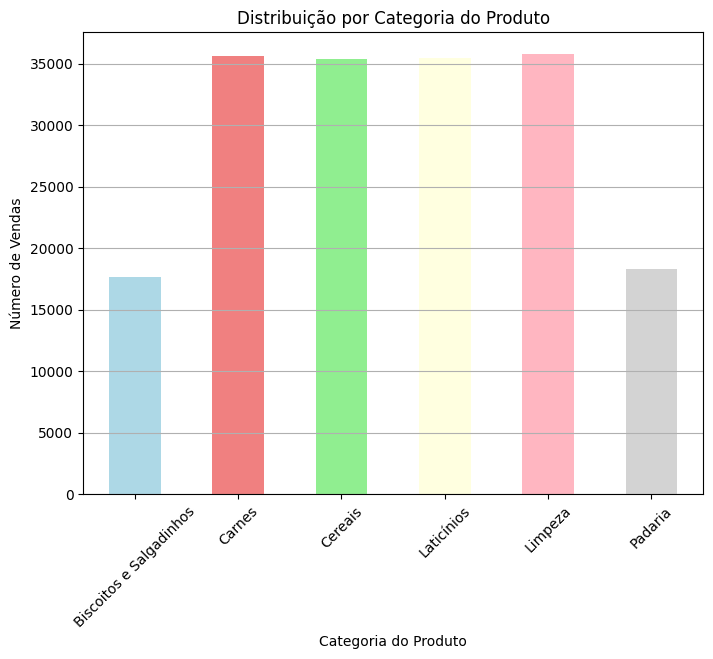

In [26]:
distribuicao_categoria = data.groupby('Linha de Produto')['Quantidade'].sum()

plt.figure(figsize=(8, 6))
distribuicao_categoria.plot(
    kind='bar', 
    color=['#ADD8E6', '#F08080', '#90EE90', '#FFFFE0', '#FFB6C1', '#D3D3D3']
)
plt.title('Distribuição por Categoria do Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y')
plt.show()